In [6]:
%load_ext django_orm_magic

In [7]:
%%django_orm
from django.db import models

class Empresa(models.Model): 
    # aka comercio
    external_id = models.PositiveIntegerField(null=True, blank=True)
    nombre = models.CharField(max_length=80)
    

class Cadena(models.Model):
    # aka Bandera
    external_id = models.PositiveIntegerField()
    empresa = models.ForeignKey('Empresa', on_delete=models.CASCADE)
    nombre = models.CharField(max_length=80)

    
class Sucursal(models.Model):
    external_id = models.CharField(max_length=20, primary_key=True)
    localidad = models.CharField(max_length=80)
    nombre = models.CharField(max_length=50)
    direccion = models.CharField(max_length=100)
    tipo = models.CharField(max_length=20)
    lat = models.FloatField()
    lng = models.FloatField()
    cadena = models.ForeignKey('Cadena', on_delete=models.CASCADE)
    
    
class Marca(models.Model):
    nombre = models.CharField(max_length=80, primary_key=True)
    empresa = models.ForeignKey('Empresa', null=True, on_delete=models.SET_NULL)
    

class Categoria(models.Model):
    nombre = models.CharField(max_length=80)
    
    
class Producto(models.Model):
    codigo = models.CharField(max_length=20, primary_key=True)
    nombre = models.CharField(max_length=150)
    marca = models.ForeignKey('Marca',  on_delete=models.CASCADE)
    categoria = models.ForeignKey('Categoria', null=True, on_delete=models.SET_NULL)
    presentacion = models.CharField(max_length=50)
    
class Relevamiento(models.Model):
    fecha = models.DateField()
    
    
class Precio(models.Model):
    relevamiento = models.ForeignKey(Relevamiento, on_delete=models.CASCADE)
    producto = models.ForeignKey(Producto, on_delete=models.CASCADE)
    sucursal = models.ForeignKey(Sucursal, on_delete=models.CASCADE)
    precio = models.FloatField()  # DecimalField(max_digits=6, decimal_places=2)

In [3]:
import pandas as pd

In [4]:
Relevamiento.objects.values_list('fecha', flat=True)

<QuerySet [datetime.date(2018, 4, 20), datetime.date(2018, 4, 29), datetime.date(2018, 5, 8), datetime.date(2018, 5, 15), datetime.date(2018, 5, 22)]>

In [5]:
relevamientos = list(Relevamiento.objects.all())

In [6]:
precios_abril = relevamientos[0].precio_set
precios_mayo = relevamientos[-1].precio_set
precios_abril.count(), precios_mayo.count(), 

(6441097, 5989746)

In [8]:
columns = ['producto_id', 'sucursal_id', 'precio']
pd_abril = pd.DataFrame.from_records(list(precios_abril.values_list(*columns)), columns=columns)
pd_mayo = pd.DataFrame.from_records(list(precios_mayo.values_list(*columns)), columns=columns)

In [9]:
cruce = pd.merge(pd_abril, pd_mayo, on=['producto_id', 'sucursal_id'], suffixes=('_abril', '_mayo'))
cruce

,producto_id,sucursal_id,precio_abril,precio_mayo
0,7790080065183,9-2-12,22.45,22.45
1,7791337651227,9-2-12,22.99,23.99
2,7791337690820,9-2-12,40.00,40.00
3,7790080065152,9-2-12,19.99,19.99
4,7790080065169,9-2-12,19.99,19.99
5,7790080065190,9-2-12,22.45,22.45
6,7791337601215,9-2-12,22.99,23.99
7,7791337690813,9-2-12,40.00,40.00
8,7791337695726,9-2-12,40.00,40.00
9,7790080065145,9-2-12,22.49,22.99


Calculamos el % de aumento

In [10]:
cruce['aumento'] = (cruce['precio_mayo'] - cruce['precio_abril']) * 100 / cruce['precio_abril']
cruce

,producto_id,sucursal_id,precio_abril,precio_mayo,aumento
0,7790080065183,9-2-12,22.45,22.45,0.000000
1,7791337651227,9-2-12,22.99,23.99,4.349717
2,7791337690820,9-2-12,40.00,40.00,0.000000
3,7790080065152,9-2-12,19.99,19.99,0.000000
4,7790080065169,9-2-12,19.99,19.99,0.000000
5,7790080065190,9-2-12,22.45,22.45,0.000000
6,7791337601215,9-2-12,22.99,23.99,4.349717
7,7791337690813,9-2-12,40.00,40.00,0.000000
8,7791337695726,9-2-12,40.00,40.00,0.000000
9,7790080065145,9-2-12,22.49,22.99,2.223210


Algunas estadísticas de aumentos

In [10]:
cruce.aumento.describe()

count    4.587553e+06
mean     3.743409e+00
std      1.060391e+01
min     -9.774306e+01
25%      0.000000e+00
50%      0.000000e+00
75%      7.067138e+00
max      2.403759e+03
Name: aumento, dtype: float64

In [11]:
import numpy as np
cruce.aumento.quantile(np.linspace(.1, 1, 9, 0))

0.1     0.000000
0.2     0.000000
0.3     0.000000
0.4     0.000000
0.5     0.000000
0.6     0.946671
0.7     5.083089
0.8     9.062500
0.9    13.100437
Name: aumento, dtype: float64

In [12]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dbdb42978>]], dtype=object)

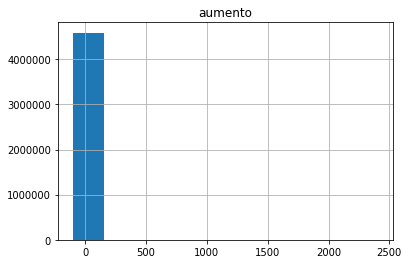

In [13]:
cruce.hist('aumento')

Obtengo un dataset sin extremos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2da1b07e80>]], dtype=object)

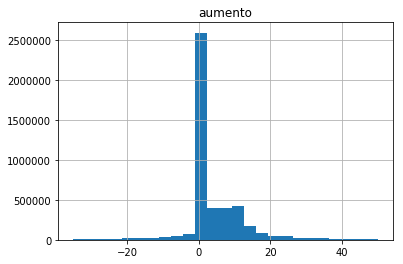

In [14]:
cruce_sin_extremos = cruce.loc[(cruce.aumento >= -35) & (cruce.aumento <= 50)]
cruce_sin_extremos.hist('aumento', bins=25)

preparo un frame de sucursales para tener detalles

In [15]:
sucs = pd.DataFrame.from_records(
    list(Sucursal.objects.values_list('external_id', 'cadena__nombre', 'cadena__empresa__nombre')),
    columns=['sucursal_id', 'cadena', 'empresa']
)

# en la db me olvidé el dato de provincia, asi lo que leo del csv original
provs = pd.read_csv('datasets/sucursales.csv', usecols=['provincia','sucursalId', 'comercioId', 'banderaId'])
provs['sucursal_id'] = provs.apply(lambda x: f"{x['comercioId']}-{x['banderaId']}-{x['sucursalId']}", axis=1)
provs.drop(['sucursalId', 'comercioId', 'banderaId'], axis=1, inplace=True)
sucs = pd.merge(sucs, provs, on='sucursal_id')
sucs.head()

,sucursal_id,cadena,empresa,provincia
0,9-2-916,Disco,Jumbo Retail Argentina S.A.,AR-C
1,9-3-5231,Jumbo,Jumbo Retail Argentina S.A.,AR-C
2,9-1-741,Vea,Jumbo Retail Argentina S.A.,AR-C
3,9-1-10,Vea,Jumbo Retail Argentina S.A.,AR-C
4,9-1-5,Vea,Jumbo Retail Argentina S.A.,AR-C


y ahora cruzo los datos via sucursal_id

In [16]:
prods = pd.DataFrame.from_records(list(Producto.objects.values_list('codigo', 'marca')), columns=['producto_id', 'marca'])
con_marca = pd.merge(cruce_sin_extremos, prods, on='producto_id')
con_marca_cadena_y_prov = pd.merge(con_marca, sucs, on='sucursal_id')
con_marca_cadena_y_prov.head()

,producto_id,sucursal_id,precio_abril,precio_mayo,aumento,marca,cadena,empresa,provincia
0,7790080065183,9-2-12,22.45,22.45,0.000000,YOGS,Disco,Jumbo Retail Argentina S.A.,AR-C
1,7791337651227,9-2-12,22.99,23.99,4.349717,YOGURISIMO,Disco,Jumbo Retail Argentina S.A.,AR-C
2,7791337690820,9-2-12,40.00,40.00,0.000000,YOGURISIMO,Disco,Jumbo Retail Argentina S.A.,AR-C
3,7790080065152,9-2-12,19.99,19.99,0.000000,YOGS,Disco,Jumbo Retail Argentina S.A.,AR-C
4,7790080065169,9-2-12,19.99,19.99,0.000000,YOGS,Disco,Jumbo Retail Argentina S.A.,AR-C


Reemplazamos los codigos de provincias

In [25]:
# from https://es.wikipedia.org/wiki/ISO_3166-2:AR
text = """
AR-A	Salta
AR-B	Provincia de Buenos Aires
AR-C	Ciudad Autónoma de Buenos Aires
AR-D	San Luis
AR-E	Entre Ríos
AR-F	La Rioja
AR-G	Santiago del Estero
AR-H	Chaco
AR-J	San Juan
AR-K	Catamarca
AR-L	La Pampa
AR-M	Mendoza
AR-N	Misiones
AR-P	Formosa
AR-Q	Neuquén
AR-R	Río Negro
AR-S	Santa Fe
AR-T	Tucumán
AR-U	Chubut
AR-V	Tierra del Fuego
AR-W	Corrientes
AR-X	Córdoba
AR-Y	Jujuy
AR-Z	Santa Cruz
"""
from io import StringIO
cods = pd.read_table( StringIO(text), names=['codigo', 'prov'])

In [26]:
data = pd.merge(con_marca_cadena_y_prov, cods, left_on='provincia', right_on='codigo')
data.drop(['provincia', 'codigo'], axis=1, inplace=True)
data

,producto_id,sucursal_id,precio_abril,precio_mayo,aumento,marca,cadena,empresa,prov
0,7790080065183,9-2-12,22.45,22.45,0.000000,YOGS,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires
1,7791337651227,9-2-12,22.99,23.99,4.349717,YOGURISIMO,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires
2,7791337690820,9-2-12,40.00,40.00,0.000000,YOGURISIMO,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires
3,7790080065152,9-2-12,19.99,19.99,0.000000,YOGS,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires
4,7790080065169,9-2-12,19.99,19.99,0.000000,YOGS,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires
5,7790080065190,9-2-12,22.45,22.45,0.000000,YOGS,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires
6,7791337601215,9-2-12,22.99,23.99,4.349717,YOGURISIMO,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires
7,7791337690813,9-2-12,40.00,40.00,0.000000,YOGURISIMO,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires
8,7791337695726,9-2-12,40.00,40.00,0.000000,YOGURISIMO,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires
9,7790080065145,9-2-12,22.49,22.99,2.223210,YOGS,Disco,Jumbo Retail Argentina S.A.,Ciudad Autónoma de Buenos Aires


Este será el dataset a utilizar

In [28]:
data.to_csv('precios_20_abril_al_22_mayo.csv', index=False)

In [1]:
# kernel restarted here

import pandas as pd
data = pd.read_csv('precios_20_abril_al_22_mayo.csv')

/home/tin/.virtualenvs/curso/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.producto_id = data.producto_id.astype(str)

In [3]:
data.aumento.describe()

count    4.522925e+06
mean     3.528030e+00
std      8.359906e+00
min     -3.500000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      7.046880e+00
max      5.000000e+01
Name: aumento, dtype: float64

INDICE OpenDataCórdoba DE PRECIOS ABRIL/MAYO: 3.52%

## Aumentos por marca

Se consideran las cantidad de productos de cada marca para evitar outliers

In [8]:
prods = pd.DataFrame.from_records(list(Producto.objects.values_list('codigo', 'marca')), columns=['producto_id', 'marca'])

In [9]:
by_marca = data.groupby('marca').aumento.mean()
by_marca_count =  prods.groupby('marca').count()

por_marcas = by_marca.to_frame('aumento').join(by_marca_count.producto_id.to_frame('cantidad_prods'))

In [13]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783c1f60f0>]], dtype=object)

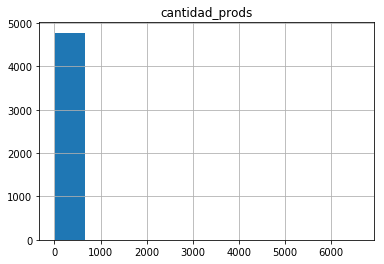

In [14]:
por_marcas.hist('cantidad_prods')

Por ejemplo, podemos filtrar las marcas con muchos productos en góndola. Son tipicamente las marcas propias de los supermercados. 

In [20]:
por_marcas.loc[(por_marcas['cantidad_prods'] > 300)].sort_values('aumento', ascending=False)

,aumento,cantidad_prods
marca,,
CARREFOUR,11.103335,1214
JUMBO,5.898729,405
GLADE,5.233549,410
LA ANONIMA,4.360865,602
VEA,3.825359,338
DIA,2.460562,823
LA SERENISIMA,1.880789,360
SIN MARCA,1.151312,6607
PRIMER PRECIO,-2.072718,820


Los productos propios de Carrefour aumentaron 11.10% en 1 mes. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1cab7a860>]], dtype=object)

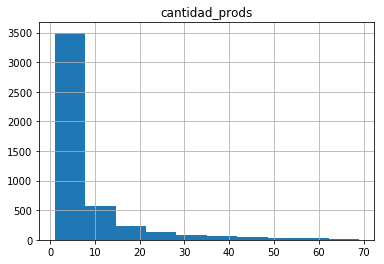

In [24]:
por_marcas_hasta_70 = por_marcas.loc[(por_marcas['cantidad_prods'] < 70)]
por_marcas_hasta_70.hist('cantidad_prods')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2034fe4a8>]], dtype=object)

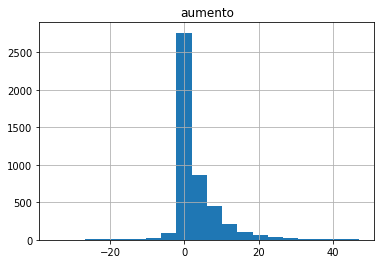

In [26]:
por_marcas_hasta_70.hist('aumento', bins=20)

In [24]:
por_marcas.cantidad_prods.median()

3.0

Si bien la gran mayoria de las marcas tienen pocos productos, consideraremos marcas con más productos para asumirlas como representativas del mercado

Marcas con más de 12 productos en el mercado que más aumentaron

In [27]:
pd.set_option('max_rows', 150)
por_marcas.loc[(por_marcas['cantidad_prods'] > 12)].sort_values('aumento', ascending=False)[:200]

,aumento,cantidad_prods
marca,,
IGEA,28.233806,33
JOSIMAR,25.219169,55
ESTRELLA DEL PARANA,25.083567,17
FAVORITA,22.600358,17
LA PROVIDENCIA,22.475954,14
MENDIA,21.075847,47
FRUTAS DEL SUR,20.404075,17
LA REINA,19.404913,13
BARBARA,18.580025,33


Nos falta el dato de fabricante de cada marca, para agrupar. 




## Aumentos por cadena

In [28]:
por_cadena = data.groupby('cadena').aumento.mean().sort_values(ascending=False).to_frame('aumento')
por_cadena

,aumento
cadena,
DEHEZA S.A.I.C.F. e I.,10.636360
JOSIMAR SUPERMERCADOS,9.790430
FULL,6.639613
Vea,6.047344
Toledo,5.888554
Disco,4.210848
COTO CICSA,3.965042
Jumbo,3.951937
Walmart Supermercado,3.791745


In [31]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)

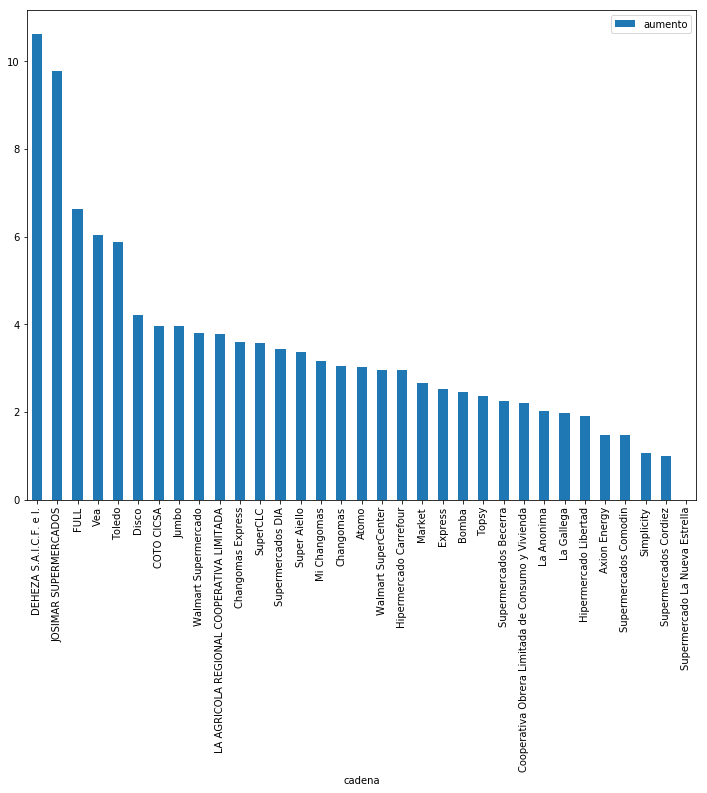

In [32]:
por_cadena.plot.bar()

In [33]:
por_empresa = data.groupby('empresa').aumento.mean().sort_values(ascending=False).to_frame('aumento')
por_empresa

,aumento
empresa,
Deheza S.A.I.C.F. e I.,10.636360
Josimar S.A.,9.790430
Operadora de Estaciones de Servicios S.A.,6.639613
Supermercados Toledo S.A.,5.888554
Jumbo Retail Argentina S.A.,5.209676
Coto Centro Integral de Comercialización S.A.,3.965042
La Agricola Regional Cooperativa Limitada,3.774270
SUPERCLC S.A.,3.572221
DIA Argentina S.A,3.438581


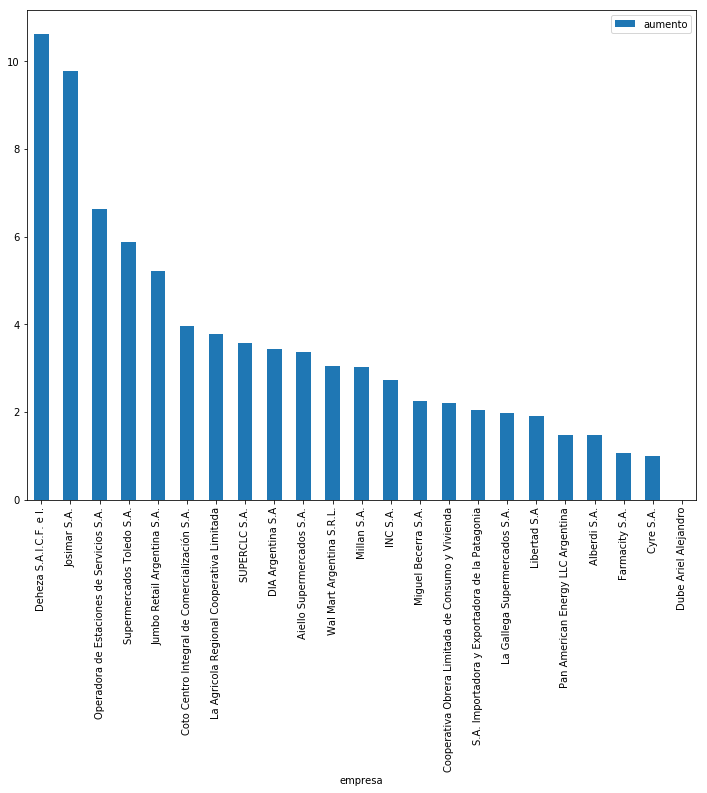

In [35]:
por_empresa.plot.bar()

### Por provincia

list

In [46]:
pd.merge(data, cods, left_on='provincia', right_on='codigo')

KeyboardInterrupt: 

In [167]:
data.groupby('provincia_x').aumento.mean().sort_values(ascending=False).to_frame('aumento')

,aumento
provincia_x,
AR-M,5.552788
AR-F,5.028067
AR-T,4.992299
AR-K,4.914981
AR-G,4.571794
AR-D,3.968613
AR-E,3.880488
AR-B,3.687618
AR-C,3.578544
